In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, LeaveOneOut
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# 1st Dataset - Whine Dataset

In [30]:
# Load wine data
whine_data = pd.read_csv("data/whine-data/wine_dataset.csv")

# Separate features and target
X = whine_data.drop("class", axis=1)
y = whine_data["class"]

count = y.value_counts()
print(count)

class
0    4898
1    1599
Name: count, dtype: int64


## Hold-Out stratify

In [31]:
# Perform stratified Hold-Out split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Balance data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [32]:
# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the resampled training data
model_1NN.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model_1NN.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1470
           1       0.98      0.99      0.98       480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950


Accuracy of the model: 0.9923076923076923




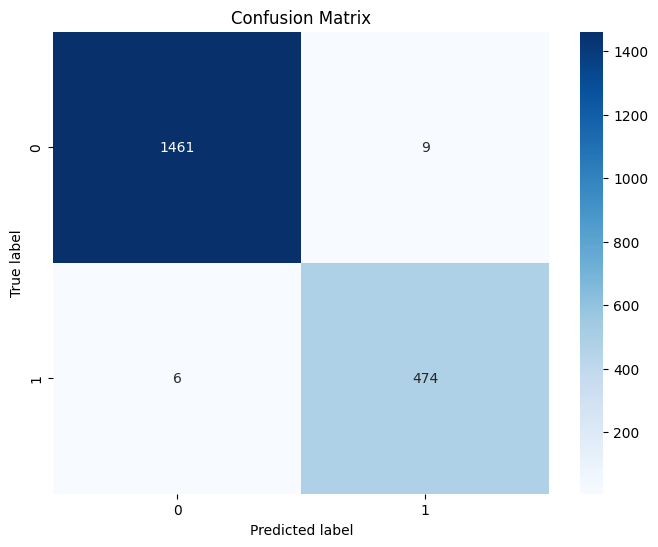

In [33]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

# Create a heatmap for the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [34]:
# Initialize the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [35]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9932286357710087



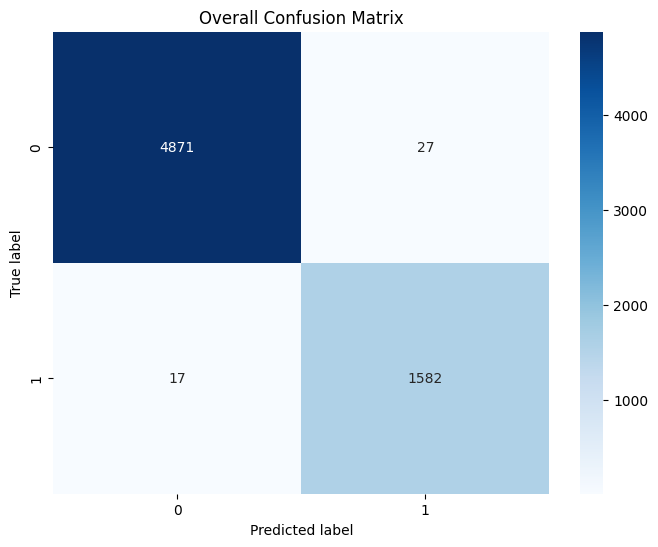

In [36]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [37]:
model_1NN = KNeighborsClassifier(n_neighbors=1)

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [38]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9935354779128829



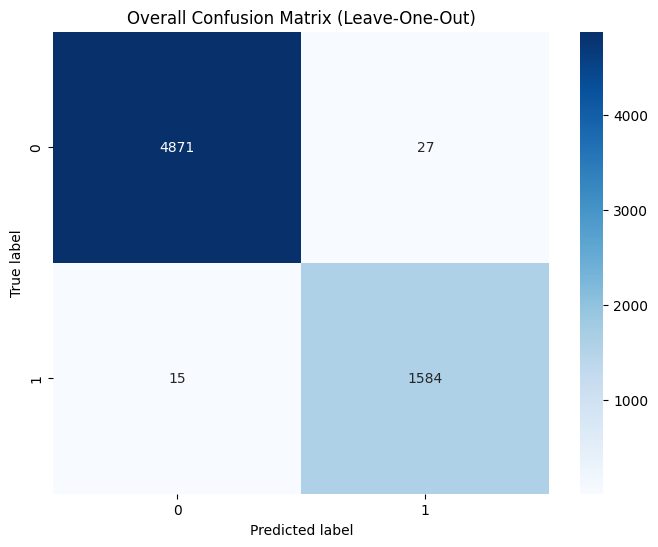

In [39]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()

# 2nd Dataset - Gamma Telescope Dataset

In [40]:
gamma_data = pd.read_csv("data/GammaTelescopeData/gamma_dataset.csv")

X = gamma_data.drop("class", axis=1)
y = gamma_data["class"]

count = y.value_counts()
print(count)

class
0    12332
1     6688
Name: count, dtype: int64


## Hold-Out stratify

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)# Instantiate the classifier

In [42]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the resampled training data
model_1NN.fit(X_train_resampled, y_train_resampled)

y_pred = model_1NN.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3700
           1       0.74      0.74      0.74      2006

    accuracy                           0.82      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.82      0.82      0.82      5706


Accuracy of the model: 0.8184367332632316




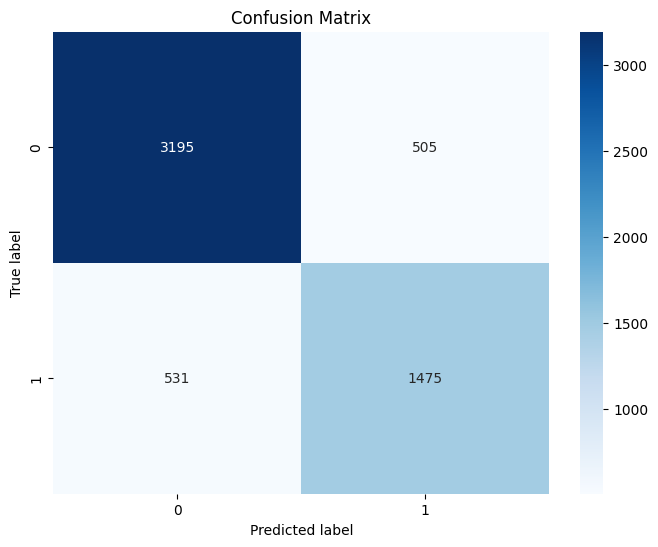

In [43]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [44]:
model_1NN = KNeighborsClassifier(n_neighbors=1)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [45]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.8166140904311252



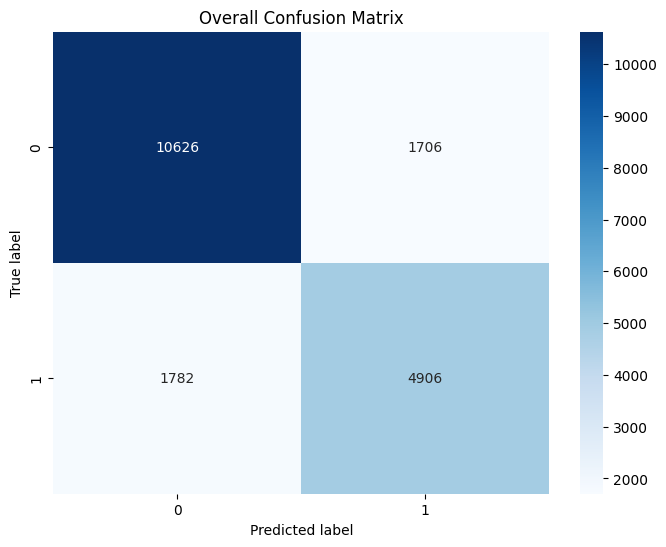

In [46]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [47]:
model_1NN = KNeighborsClassifier(n_neighbors=1)

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [48]:
gamma_data = pd.concat([X, y], axis=1)

sampled_data = gamma_data.groupby("class").sample(n=1000, random_state=42)


X_sampled = sampled_data.drop("class", axis=1)
y_sampled = sampled_data["class"]

print(y_sampled.value_counts())

class
0    1000
1    1000
Name: count, dtype: int64


In [49]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X_sampled):
    X_train, X_test = X_sampled.iloc[train_index], X_sampled.iloc[test_index]
    y_train, y_test = y_sampled.iloc[train_index], y_sampled.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    model_1NN.fit(X_train_resampled, y_train_resampled)
    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.7685



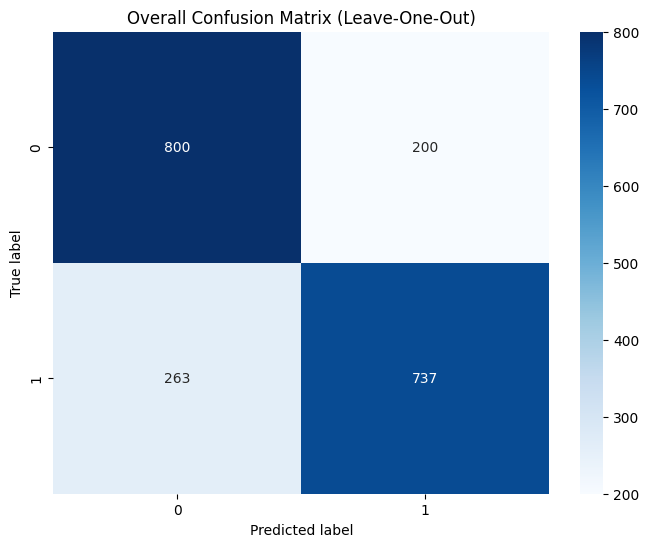

In [50]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()

# 3rd Dataset - Banknote Auth Dataset

In [51]:
banknoteData = pd.read_csv("data/BanknoteAuthentication/banknote_dataset.csv")

X = banknoteData.drop("class", axis=1)
y = banknoteData["class"]

count = y.value_counts()
print(count)

class
0    762
1    610
Name: count, dtype: int64


## Hold-Out stratify

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [53]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the resampled training data
model_1NN.fit(X_train_resampled, y_train_resampled)

y_pred = model_1NN.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412


Accuracy of the model: 1.0




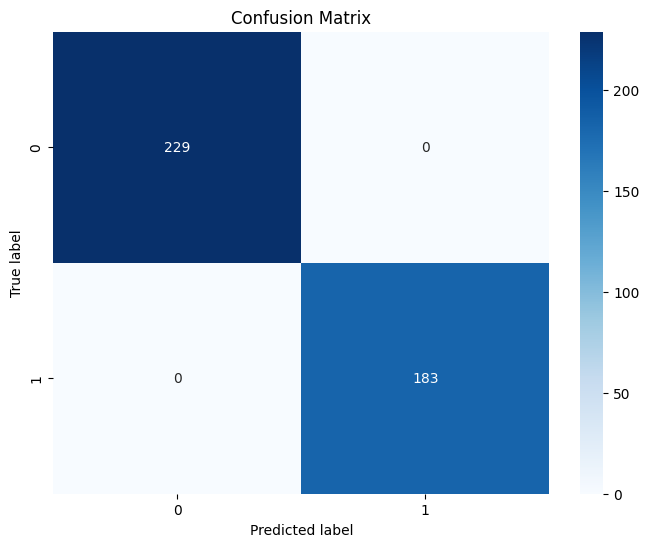

In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}\n\n")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold

In [56]:
# Instantiate the 1NN classifier
model_1NN = KNeighborsClassifier(n_neighbors=1)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
overall_confusion_matrix = np.zeros((2, 2))

In [57]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Normalize the resampled training data
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    # Normalize the test data using the same scaler
    X_test = scaler.transform(X_test)

    # Train the classifier on the resampled training data
    model_1NN.fit(X_train_resampled, y_train_resampled)

    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9978102189781021



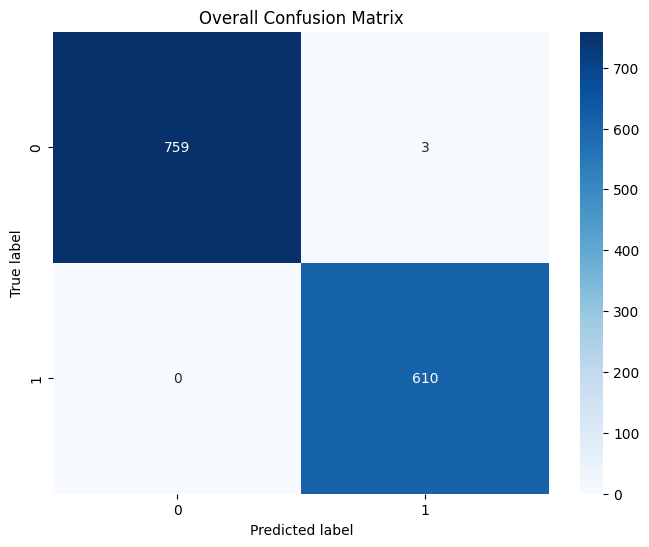

In [58]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix')
plt.show()

## Leave-One-Out

In [59]:
model_1NN = KNeighborsClassifier(n_neighbors=1)

loo = LeaveOneOut()

overall_confusion_matrix = np.zeros((2, 2))
accuracies = []

In [60]:
smote = SMOTE(random_state=42)
scaler = StandardScaler()

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train_resampled = scaler.fit_transform(X_train_resampled)

    X_test = scaler.transform(X_test)

    # Train the classifier on the resampled training data
    model_1NN.fit(X_train_resampled, y_train_resampled)

    y_pred = model_1NN.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    fold_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_confusion_matrix += fold_confusion_matrix


Overall Accuracy of the model: 0.9978134110787172



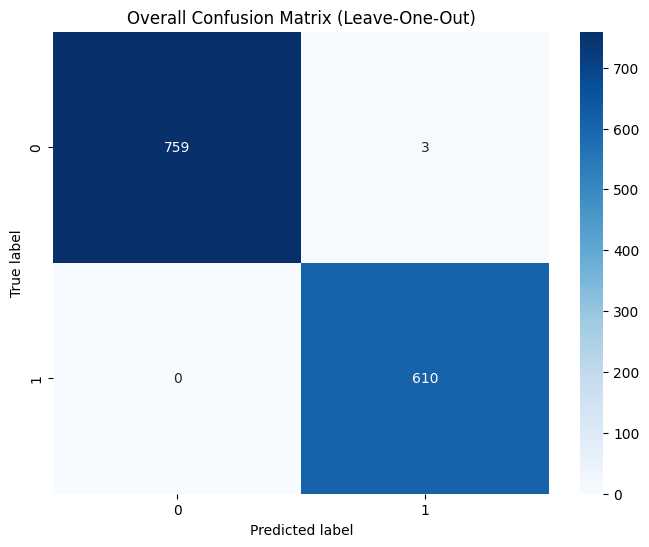

In [61]:
overall_accuracy = np.mean(accuracies)
print(f"\nOverall Accuracy of the model: {overall_accuracy}\n")

# Create a heatmap for the overall confusion matrix
plt.figure(figsize=(8, 6))

# Convert confusion matrix to integer type
overall_confusion_matrix_int = overall_confusion_matrix.astype(int)

sns.heatmap(overall_confusion_matrix_int, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])  # Specify labels
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall Confusion Matrix (Leave-One-Out)')
plt.show()